In [1]:
import yaml
import numpy as np
import cv2
import pickle

from components.matchers import GNN_Matcher
from utils import evaluation_utils

## Load model config file

In [2]:
config_url = "./sg_config.yaml"
with open(config_url, 'r') as f:
    config = yaml.load(f)

/home/chang/miniconda3/envs/sgmnet/lib/python3.7/site-packages/ipykernel_launcher.py:3: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  This is separate from the ipykernel package so we can avoid doing imports until


In [3]:
config

{'name': 'SG',
 'model_dir': './weights',
 'seed_top_k': [256, 256],
 'seed_radius_coe': 0.01,
 'net_channels': 256,
 'layer_num': 9,
 'head': 4,
 'seedlayer': [0, 6],
 'use_mc_seeding': True,
 'use_score_encoding': True,
 'conf_bar': [1.11, 0.1],
 'sink_iter': [10, 100],
 'detach_iter': 1000000,
 'p_th': 0.2}

# build Super Glue model

In [4]:
model = GNN_Matcher(config)

## load a pair of images

In [5]:
img1_url = "./demo/demo_1.jpg"
img2_url = "./demo/demo_2.jpg"
img1, img2 = cv2.imread(img1_url), cv2.imread(img2_url)

## load Super Point ketpoints and descriptors

In [6]:
kpt1 = np.load("./demo/demo1_kpt.npy")
desc1 = np.load("./demo/demo1_desc.npy")
kpt2 = np.load("./demo/demo2_kpt.npy")
desc2 = np.load("./demo/demo2_desc.npy")

## prepare input data

In [7]:
size1, size2 = np.flip(np.asarray(img1.shape[:2])), np.flip(np.asarray(img2.shape[:2]))
input_data = {'x1': kpt1, 'x2': kpt2, 'desc1': desc1, 'desc2': desc2, 'size1': size1, 'size2': size2}

## run prediction

In [8]:
corr1, corr2, scores = model.run(input_data)

/home/chang/Documents/project/SGMNet/components/matchers.py:54: UserWarning: This overload of nonzero is deprecated:
	nonzero(Tensor input, *, Tensor out)
Consider using one of the following signatures instead:
	nonzero(Tensor input, *, bool as_tuple) (Triggered internally at  /opt/conda/conda-bld/pytorch_1595629427478/work/torch/csrc/utils/python_arg_parser.cpp:766.)
  index1,index2=torch.nonzero(mask).squeeze(1),index[mask]


## save prediction result to pickle

In [9]:
match_res = dict({
        "demo1_pt":corr1,
        "demo2_pt":corr2,
        "match_score":scores
    })
with open("./result/match_result.pkl", "wb+") as f:
    pickle.dump(match_res, f)

## show matching result on pair of images

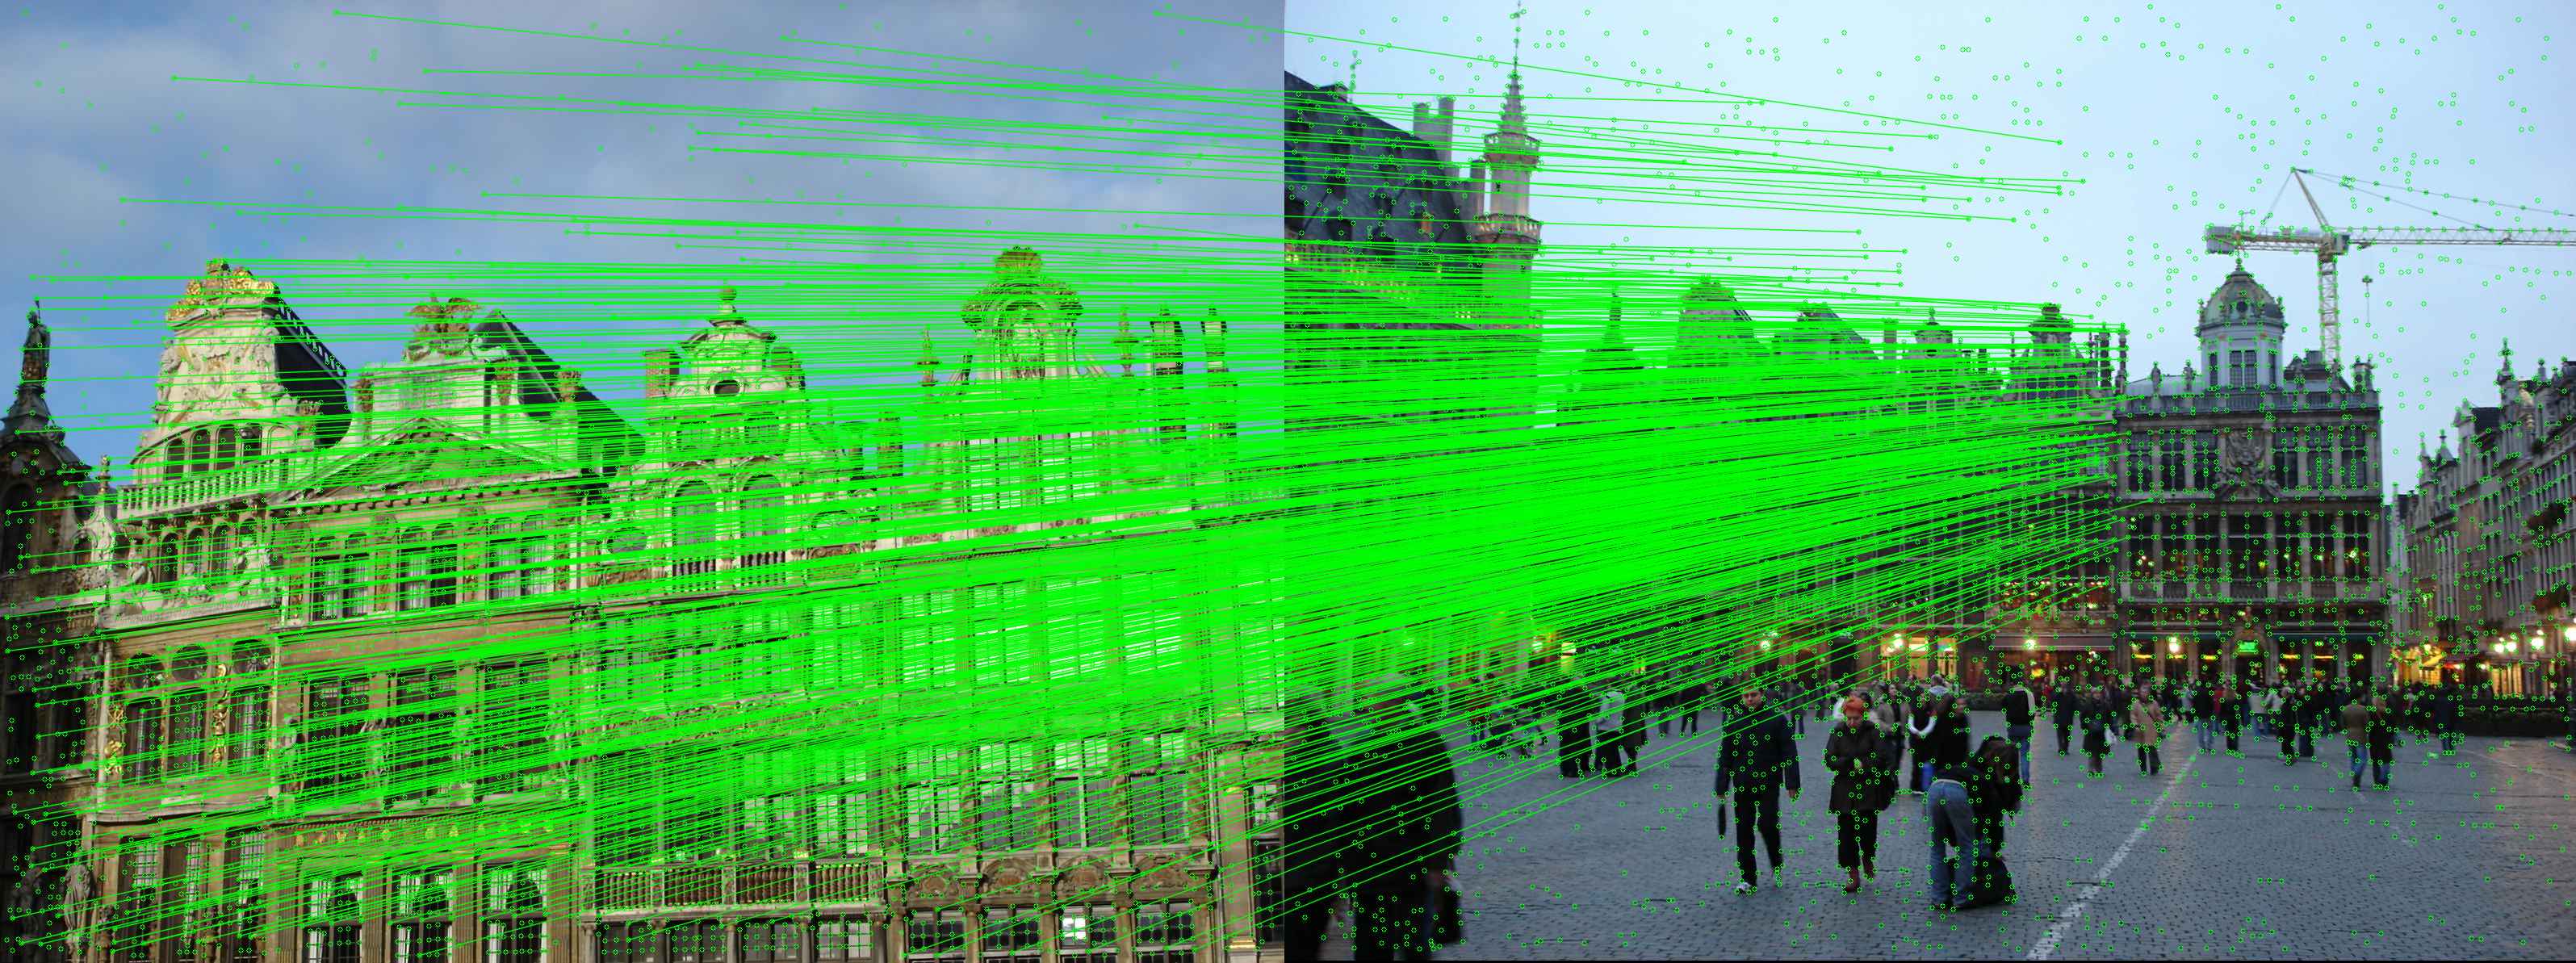

In [10]:
dis_points_1 = evaluation_utils.draw_points(img1, kpt1)
dis_points_2 = evaluation_utils.draw_points(img2, kpt2)
# visualize match
display = evaluation_utils.draw_match(dis_points_1, dis_points_2, corr1, corr2)
cv2.imwrite('./result/match.png', display)
from IPython.display import Image
Image('./result/match.png')